## Pleiades & Beehive

In [2]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
    
def x(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.cos(l*(math.pi/180))

def y(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.sin(l*(math.pi/180))

def z(R, b):
    return R * math.sin(b*(math.pi/180))

In [3]:
df1 = pd.read_csv("pleiades6-12.csv")
df2 = pd.read_csv("beehive4-7.csv")
frames = [df1, df2]
df = pd.concat(frames)

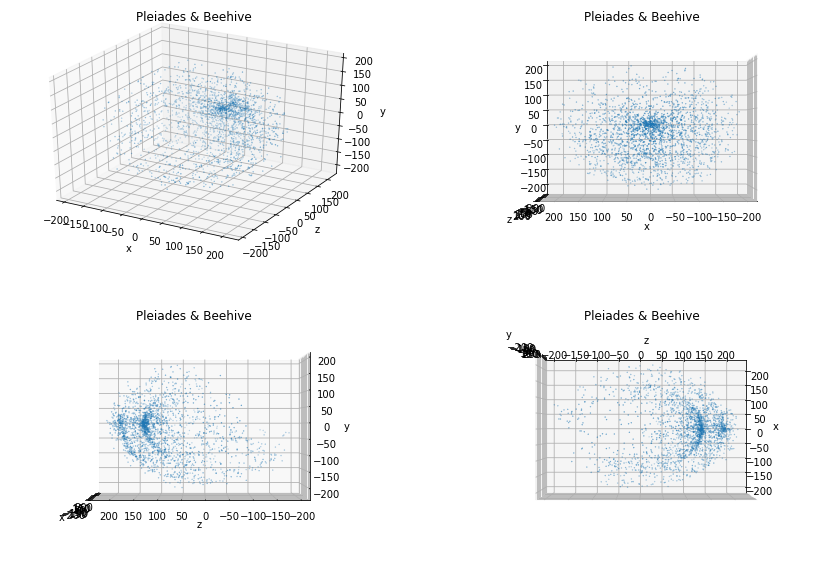

In [5]:
df.loc[:, 'parallax_arcsec'] = df['parallax'].apply(lambda x: x*.001)
df.loc[:, 'R'] = df['parallax_arcsec'].apply(distance)
df.loc[:, 'x'] = df.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'y'] = df.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'z'] = df.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Pleiades & Beehive')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Pleiades & Beehive')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.1)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Pleiades & Beehive')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.1)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Pleiades & Beehive')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

Pleiades:

SELECT * from gaiadr2.gaia_source where 
RA between 55 and 59 AND
DEC between 22 and 26 AND
parallax > 0 AND parallax <= 12.5 AND
phot_g_mean_mag < 16


Beehive:

SELECT * from gaiadr2.gaia_source where 
RA between 128 and 132 AND
DEC between 18 and 22 AND
parallax > 0 AND parallax <= 12.5 AND
phot_g_mean_mag < 16

In [8]:
df1 = pd.read_csv("pleiades-result.csv")
df2 = pd.read_csv("beehive-result.csv")
frames = [df1, df2]
df = pd.concat(frames)
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 22490 samles.


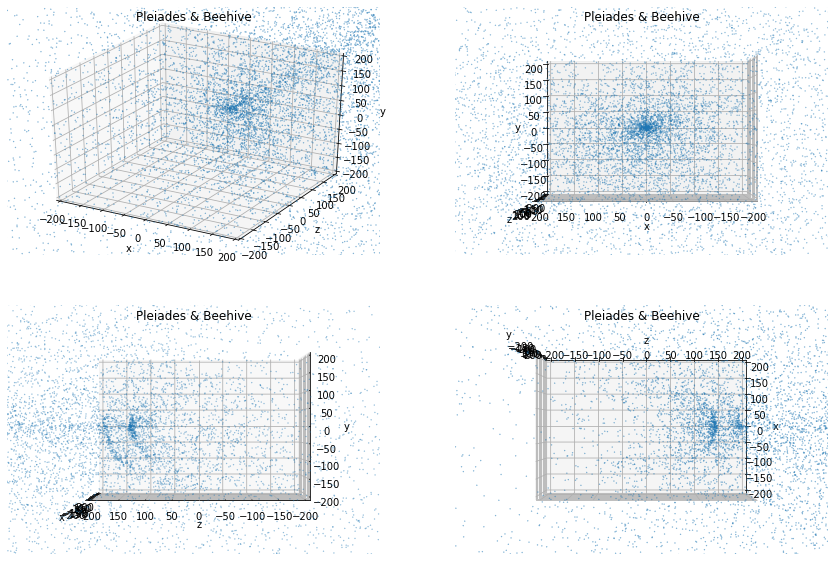

In [7]:
df.loc[:, 'parallax_arcsec'] = df['parallax'].apply(lambda x: x*.001)
df.loc[:, 'R'] = df['parallax_arcsec'].apply(distance)
df.loc[:, 'x'] = df.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'y'] = df.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'z'] = df.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-200, 200)
ax.set_title('Pleiades & Beehive')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_xlim(-200, 200)
ax1.set_ylim(-200, 200)
ax1.set_zlim(-200, 200)
ax1.set_title('Pleiades & Beehive')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.1)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_xlim(-200, 200)
ax2.set_ylim(-200, 200)
ax2.set_zlim(-200, 200)
ax2.set_title('Pleiades & Beehive')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.1)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_xlim(-200, 200)
ax3.set_ylim(-200, 200)
ax3.set_zlim(-200, 200)
ax3.set_title('Pleiades & Beehive')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

Pleiades:


Beehive: 
SELECT * from gaiadr2.gaia_source where 
RA between 125 and 135 AND
DEC between 15 and 25 AND
parallax > 5 AND parallax <= 13 AND
phot_g_mean_mag < 16

In [3]:
df1 = pd.read_csv("p.csv")
df2 = pd.read_csv("b.csv")
frames = [df1, df2]
df = pd.concat(frames)
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 23771 samles.


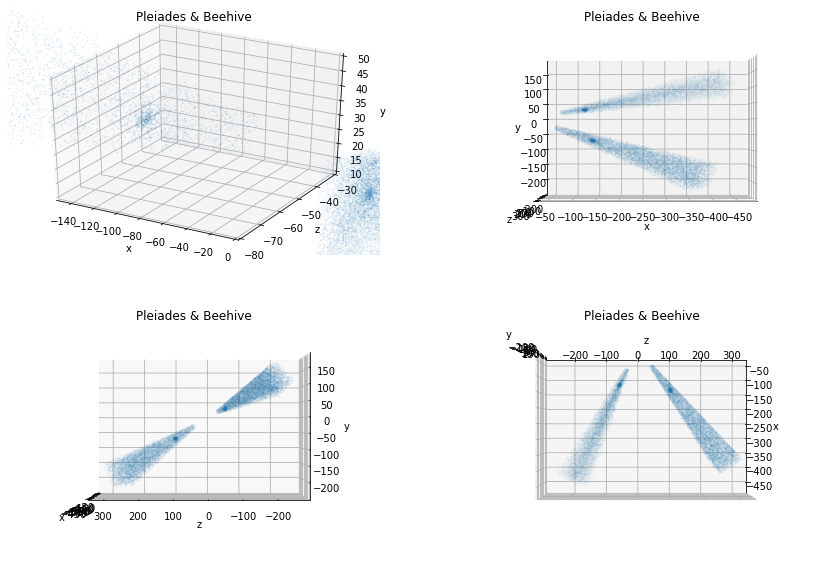

In [8]:
df.loc[:, 'parallax_arcsec'] = df['parallax'].apply(lambda x: x*.001)
df.loc[:, 'R'] = df['parallax_arcsec'].apply(distance)
df.loc[:, 'x'] = df.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'y'] = df.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'z'] = df.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.01)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_xlim([-150, 0])
ax.set_ylim([-80, -30])
ax.set_zlim([10, 50])
ax.set_title('Pleiades & Beehive')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.001)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Pleiades & Beehive')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.001)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Pleiades & Beehive')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.001)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Pleiades & Beehive')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

SELECT * from gaiadr2.gaia_source where 
RA between 50 and 135 AND
DEC between 15 and 30 AND
parallax > 5 AND parallax <= 13 AND
phot_g_mean_mag < 16

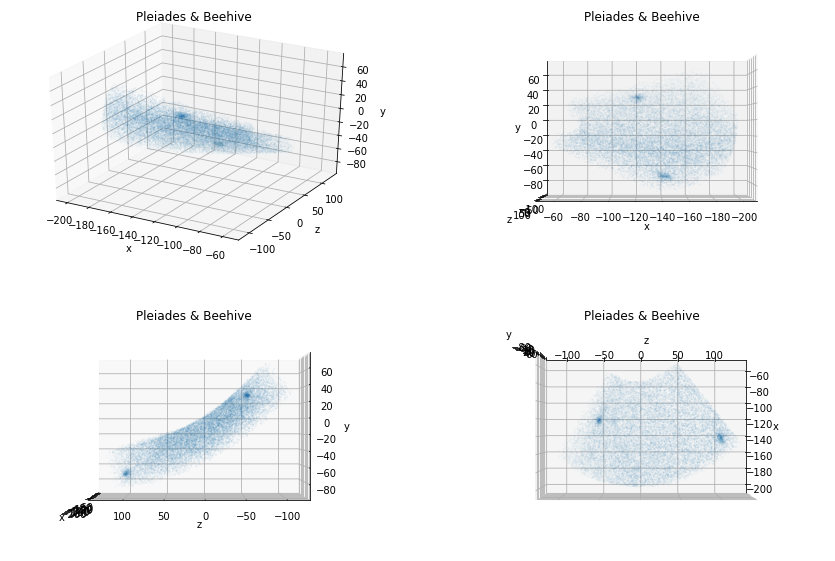

In [12]:
df = pd.read_csv("pb.csv")
df.loc[:, 'parallax_arcsec'] = df['parallax'].apply(lambda x: x*.001)
df.loc[:, 'R'] = df['parallax_arcsec'].apply(distance)
df.loc[:, 'x'] = df.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'y'] = df.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'z'] = df.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.001)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Pleiades & Beehive')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.001)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Pleiades & Beehive')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.001)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Pleiades & Beehive')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.001)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Pleiades & Beehive')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

SELECT * from gaiadr2.gaia_source where 
RA between 50 and 135 AND
DEC between 12 and 32 AND
parallax > 4.5 AND parallax <= 13 AND
phot_g_mean_mag < 16

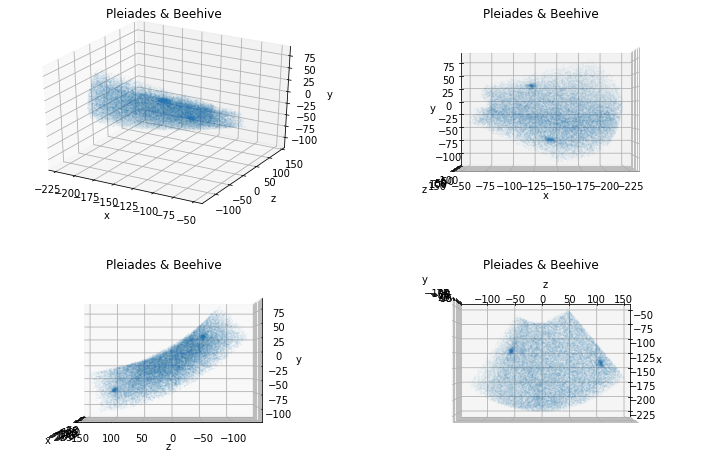

In [15]:
df = pd.read_csv("pb2.csv")
df.loc[:, 'parallax_arcsec'] = df['parallax'].apply(lambda x: x*.001)
df.loc[:, 'R'] = df['parallax_arcsec'].apply(distance)
df.loc[:, 'x'] = df.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'y'] = df.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
df.loc[:, 'z'] = df.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.001)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Pleiades & Beehive')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.001)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Pleiades & Beehive')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.001)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Pleiades & Beehive')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.001)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Pleiades & Beehive')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()